# ***Analysis on ML Test Scores***

**Batch**   - Represents the Batch Name

**User_ID** - Represents the unique student id

**Score**    - Represents the Score out of 7

*Data URL Link :* https://drive.google.com/file/d/1d5cLgsku0WUiEupuSIaNWhH3aKpo7shp/view?usp=sharing


## A look into database

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/scores_data.csv')

df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
# Clean the column names 

df.columns = df.columns.str.replace(' ', '')

In [5]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [9]:
# remove /
df['Score'] = df['Score'].apply(lambda x: x.replace('/',''))

In [13]:
# remove 7
df['Score'] = df['Score'].apply(lambda x: x.replace(' 7',''))

In [14]:
df['Score'].unique()

array(['6 ', '7 ', '4 ', '5 ', '3 ', '2 ', '0 ', '1 '], dtype=object)

In [15]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


In [16]:
df.isnull().sum().sort_values(ascending=False)

Batch      0
User_ID    0
Score      0
dtype: int64

## Plot Insights about three different batches according to their scores

<ipython-input-17-0aa5440a4e75>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'],bins=20)


<Axes: xlabel='Score', ylabel='Density'>

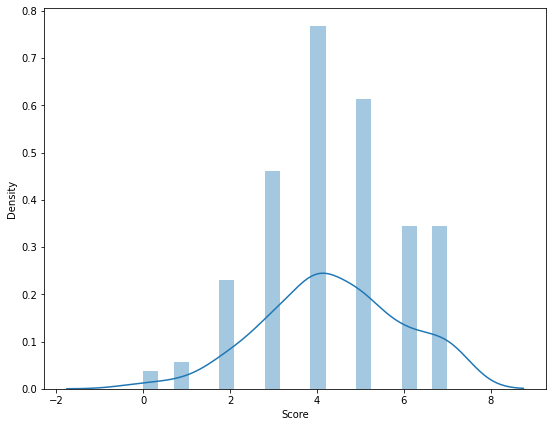

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.distplot(df['Score'],bins=20)

In [21]:
# convert score's datatype into int
df['Score']=df['Score'].astype('int')

<Axes: xlabel='Batch'>

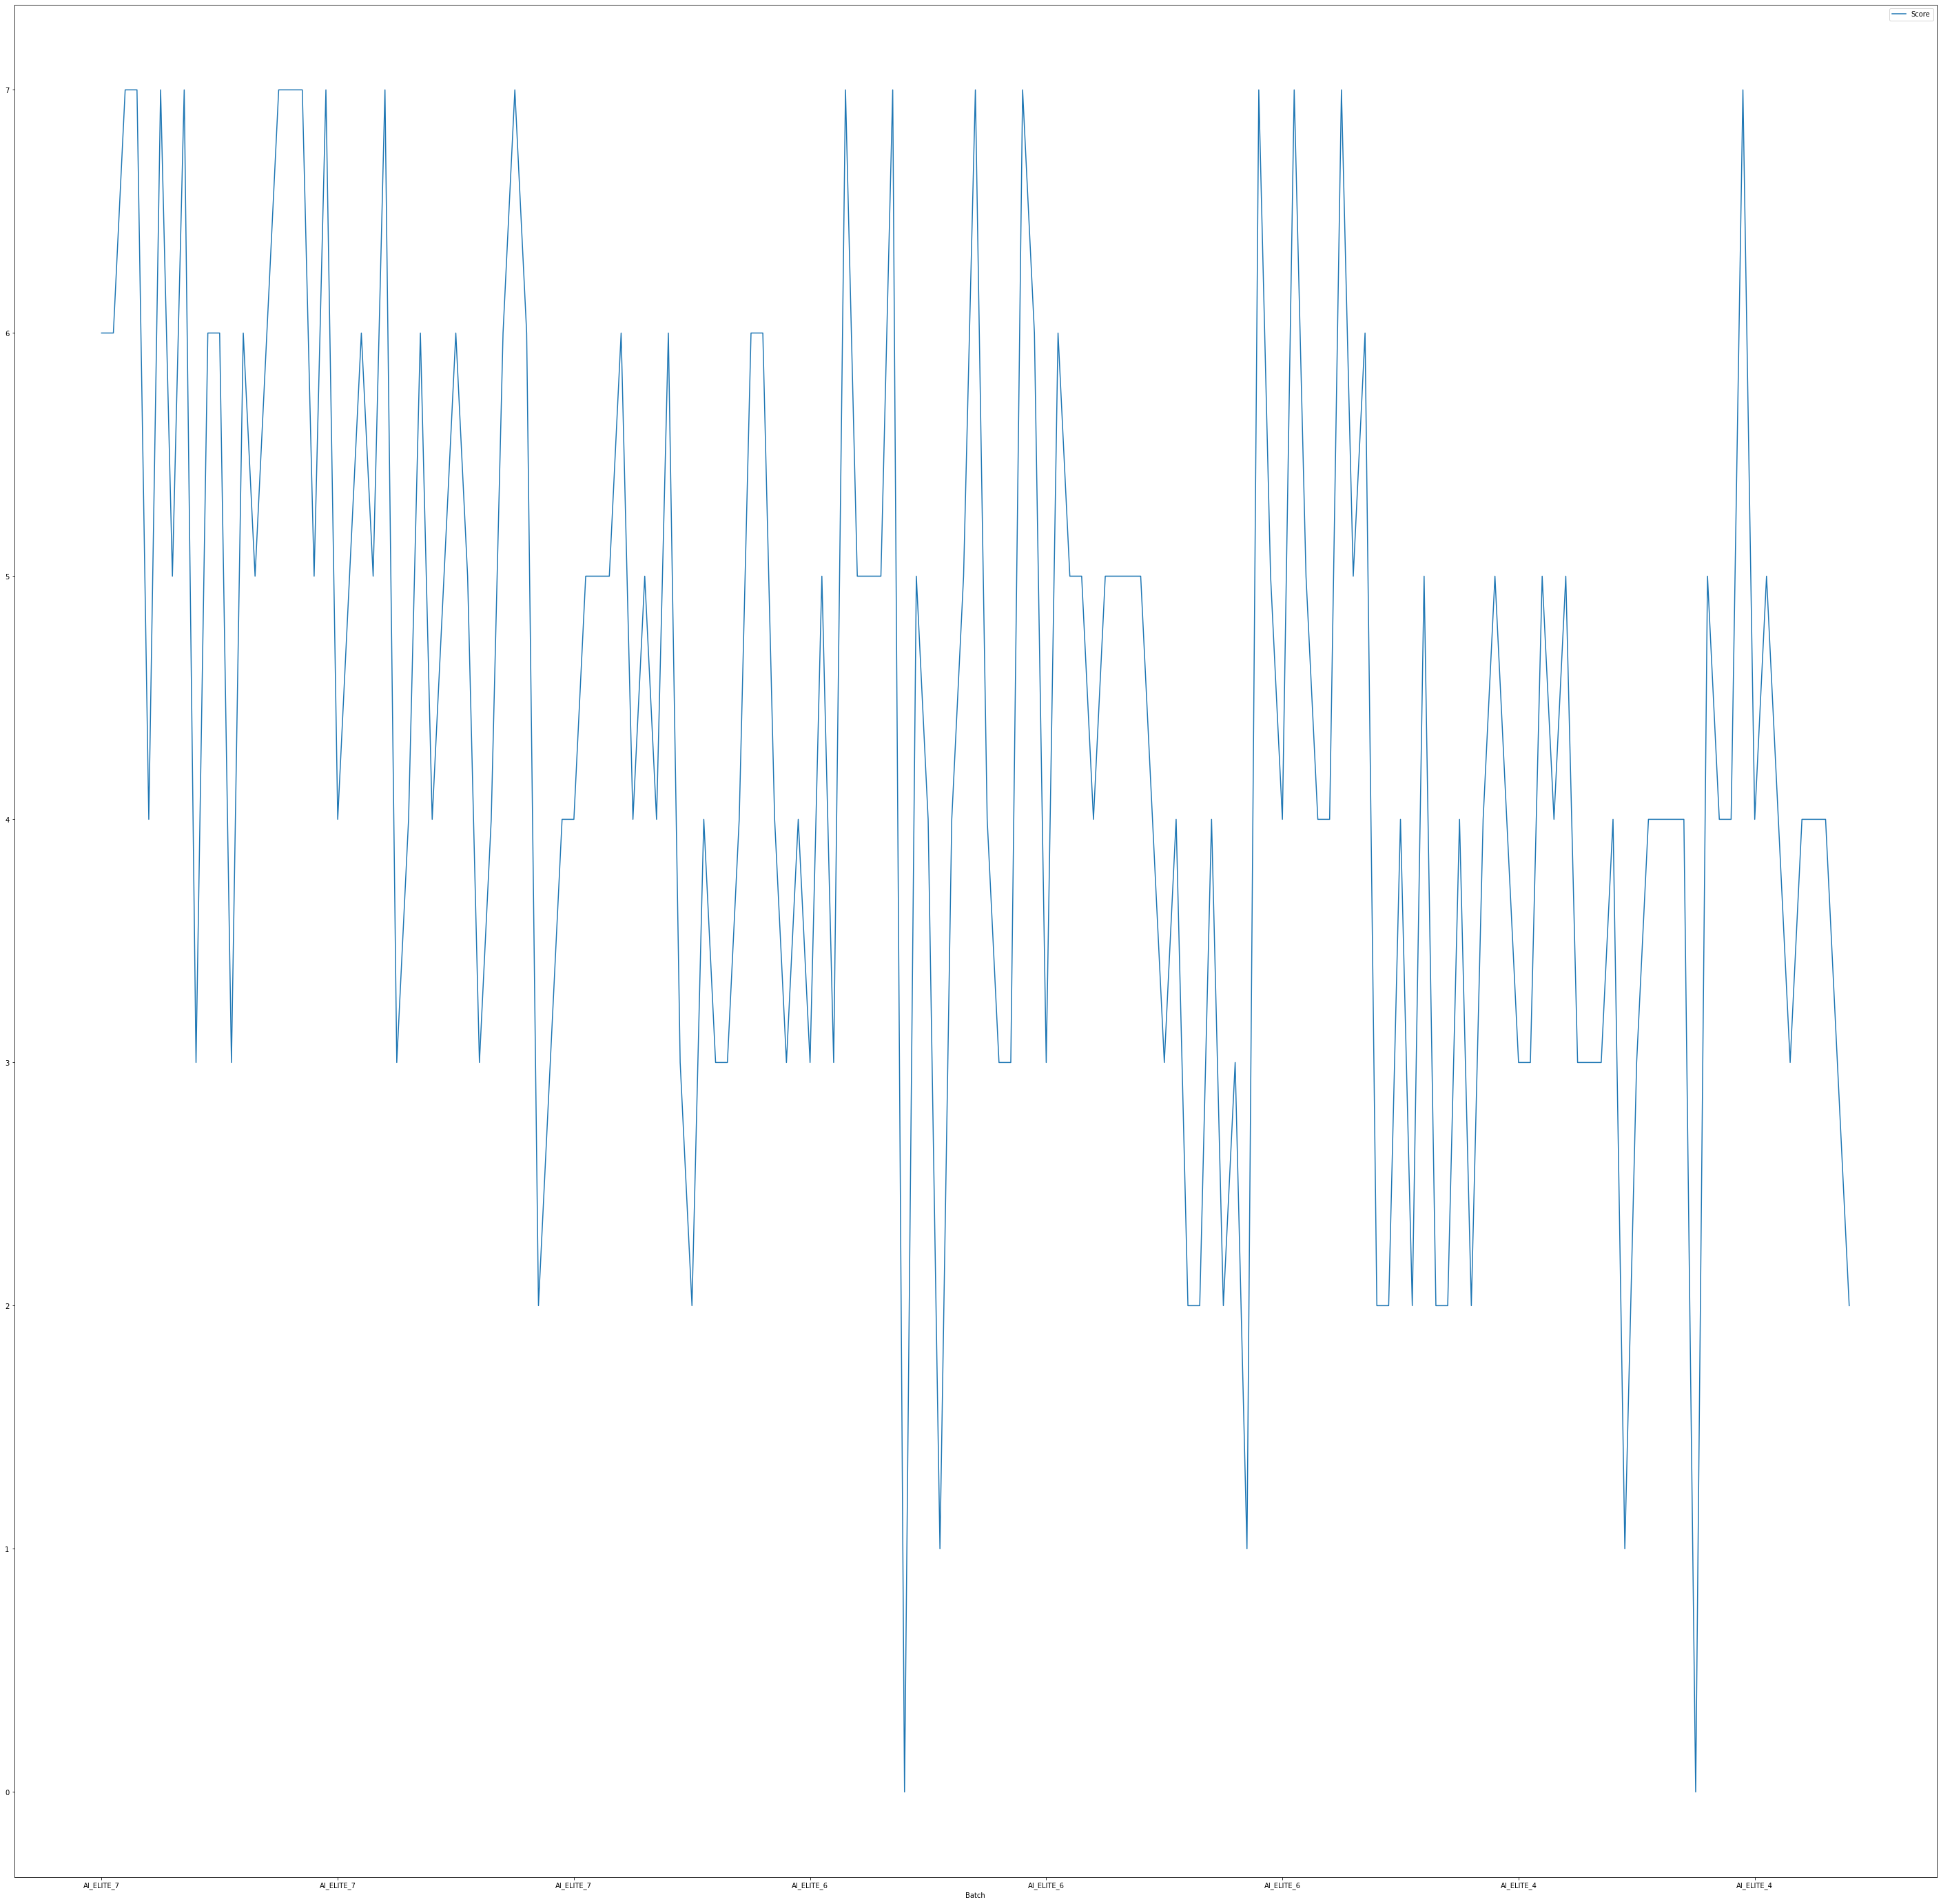

In [24]:
df.plot(x='Batch',y='Score',kind="line",figsize=(50, 50))

Batch
AI_ELITE_4    Axes(0.125,0.125;0.775x0.755)
AI_ELITE_6    Axes(0.125,0.125;0.775x0.755)
AI_ELITE_7    Axes(0.125,0.125;0.775x0.755)
dtype: object

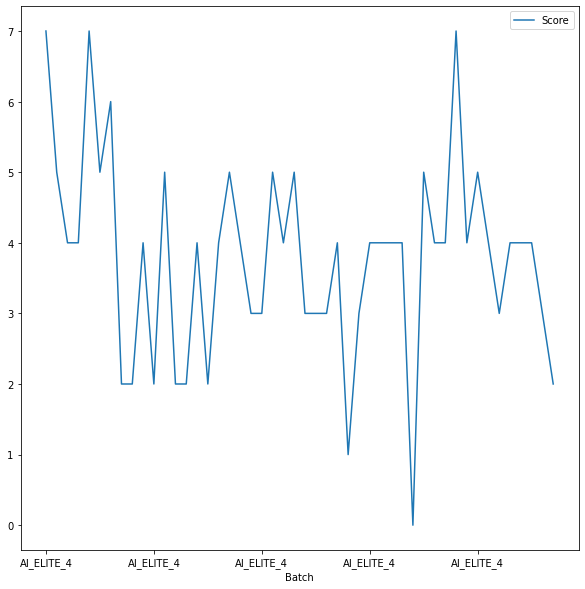

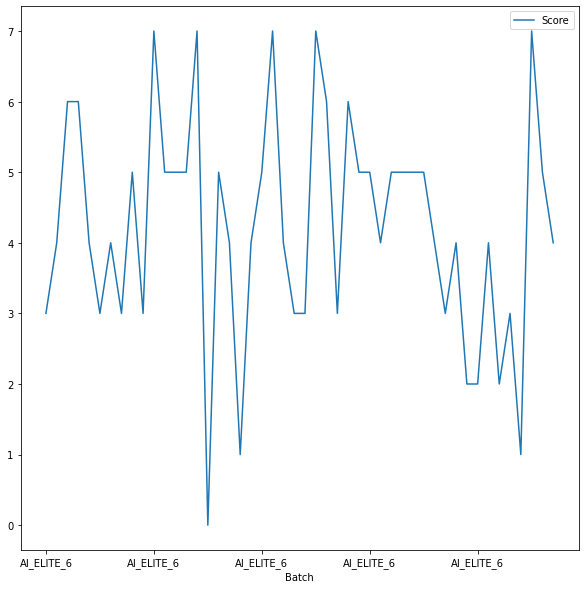

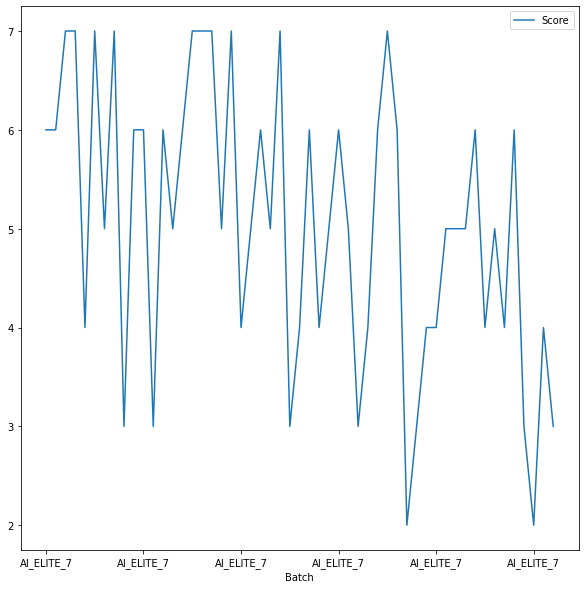

In [25]:
df1=df.groupby('Batch')
df1.plot(x='Batch',y='Score',kind="line",figsize=(10, 10))

<Axes: xlabel='Batch', ylabel='Score'>

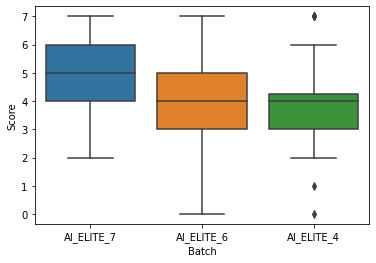

In [32]:
sns.boxplot(data=df,x='Batch',y='Score')

<Axes: xlabel='Batch', ylabel='Score'>

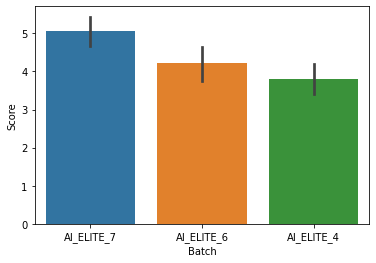

In [33]:
sns.barplot(data=df,x='Batch',y='Score')

<Axes: xlabel='Score', ylabel='Batch'>

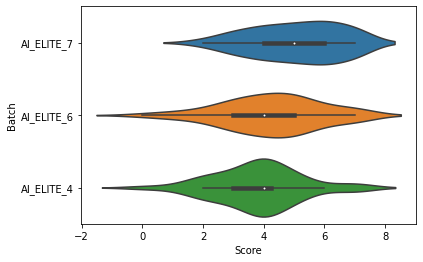

In [35]:
sns.violinplot(x=df["Score"],y=df['Batch'])